In [1]:
# imports
from sliderule import icesat2
import matplotlib.pyplot as plt
import matplotlib
import geopandas

Unable to import sklearn... clustering support disabled


In [2]:
# initialize client
#icesat2.init("slideruleearth.io", verbose=True, organization="developers", desired_nodes=7)
icesat2.init("localhost", verbose=True, organization=None)

In [3]:
# processing parameters
parms = {
    "poly": icesat2.toregion('grandmesa.geojson')['poly'],
    "t0": '2019-11-14T00:00:00Z',
    "t1": '2019-11-15T00:00:00Z',
    "srt": icesat2.SRT_LAND,
    "len": 100,
    "res": 50,
    "pass_invalid": True, 
    #"cnf": [icesat2.CNF_POSSIBLE_TEP, icesat2.CNF_NOT_CONSIDERED, icesat2.CNF_BACKGROUND, icesat2.CNF_WITHIN_10M, icesat2.CNF_SURFACE_LOW, icesat2.CNF_SURFACE_MEDIUM, icesat2.CNF_SURFACE_HIGH], 
    #"atl08_class": ["atl08_noise", "atl08_ground", "atl08_canopy", "atl08_top_of_canopy", "atl08_unclassified"],
    #"yapc": {"knn": 0, "win_h": 6, "win_x": 11, "min_ph": 4, "score": 0}, 
    "atl08_class": ["atl08_canopy", "atl08_top_of_canopy"],
    "phoreal": {"binsize": 10.0, "geoloc": "mean", "use_abs_h": True}
}

In [4]:
# atl08 request
atl08 = icesat2.atl08p(parms, asset="nsidc-s3", keep_id=True)

INFO:sliderule.icesat2:Identified 1 resources to process
INFO:sliderule.sliderule:request <AppServer.7> atl08 processing initiated on ATL03_20191114034331_07370502_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.7> processing of ATL03_20191114034331_07370502_005_01.h5 complete (691067/2108/0/0)
INFO:sliderule.sliderule:request <AppServer.7> processing complete
INFO:sliderule.sliderule:Successfully completed processing resource [1 out of 1]: ATL03_20191114034331_07370502_005_01.h5


In [5]:
# print dataframe
atl08

,segment_id,canopy_h_metrics,h_mean_canopy,extent_id,count,rgt,gt,distance,cycle,h_max_canopy,delta_time,spot,h_min_canopy,h_canopy,geometry
time,,,,,,,,,,,,,,,
2019-11-14 03:46:36.935671056,215507,"(1958.219970703125, 1958.219970703125, 1958.21...",1960.010742,3319153278633115650,34,737,10,4.321861e+06,5,1966.318970,5.893840e+07,6,1951.225586,1966.191284,POINT (-108.12262 38.83916)
2019-11-14 03:46:36.943842032,215510,"(1964.63623046875, 1964.63623046875, 1964.6362...",1965.346924,3319153278633115654,46,737,10,4.321919e+06,5,1966.603394,5.893840e+07,6,1963.738770,1964.636230,POINT (-108.12268 38.83968)
2019-11-14 03:46:36.949462768,215512,"(1969.776123046875, 1969.776123046875, 1969.77...",1966.849487,3319153278633115658,56,737,10,4.321959e+06,5,1971.964478,5.893840e+07,6,1964.517822,1971.028687,POINT (-108.12272 38.84003)
2019-11-14 03:46:36.956062088,215515,"(1969.776123046875, 1969.776123046875, 1969.77...",1970.710449,3319153278633115662,50,737,10,4.322006e+06,5,1978.727295,5.893840e+07,6,1964.878052,1978.727295,POINT (-108.12277 38.84045)
2019-11-14 03:46:36.962706472,215517,"(1979.498291015625, 1979.498291015625, 1979.49...",1977.639038,3319153278633115666,60,737,10,4.322053e+06,5,1984.130737,5.893840e+07,6,1970.028564,1980.203735,POINT (-108.12283 38.84088)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-14 03:46:42.289134880,217299,"(1721.5980224609375, 1721.5980224609375, 1721....",1720.198120,3319153280780602031,12,737,60,4.357755e+06,5,1723.646851,5.893840e+07,1,1716.485840,1716.485840,POINT (-108.08787 39.16657)
2019-11-14 03:46:42.291006240,217288,"(1791.6309814453125, 1791.6309814453125, 1791....",1791.317261,3319153278633118499,117,737,20,4.357543e+06,5,1797.796631,5.893840e+07,5,1786.914062,1788.129272,POINT (-108.16123 39.15917)
2019-11-14 03:46:42.297940440,217301,"(1715.4862060546875, 1715.4862060546875, 1715....",1718.188354,3319153280780602035,9,737,60,4.357818e+06,5,1723.646851,5.893840e+07,1,1714.897827,1721.342529,POINT (-108.08794 39.16713)


In [6]:
# create 75th percentile column and separate out ground tracks
atl08['75'] = atl08.apply(lambda row : row["canopy_h_metrics"][icesat2.P['75']], axis = 1)
canopy_gt1l = atl08[atl08['gt'] == icesat2.GT1L]

<AxesSubplot: xlabel='time'>

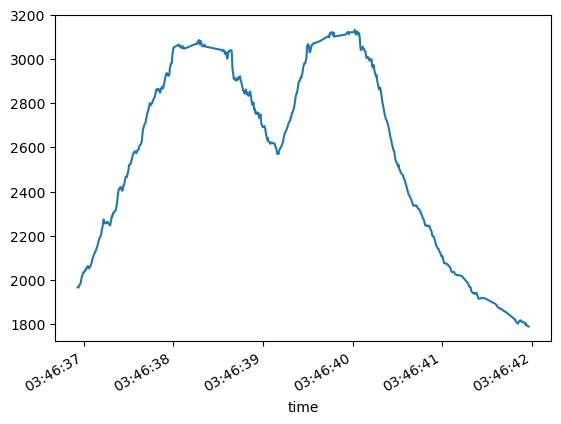

In [7]:
# plot canopy height
canopy_gt1l["h_canopy"].plot()

<AxesSubplot: xlabel='time'>

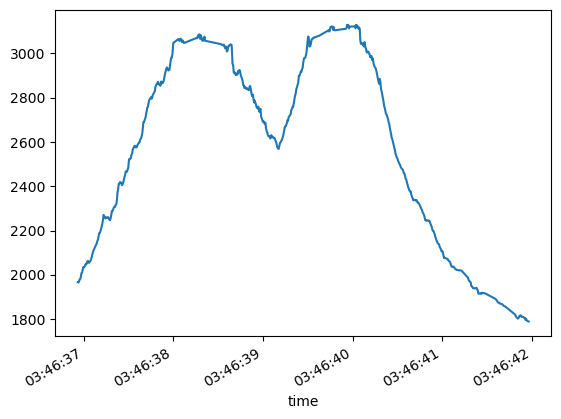

In [8]:
# cplot 75th percentile
canopy_gt1l['75'].plot()

In [9]:
# atl06 request
atl06 = icesat2.atl06p(parms, asset="nsidc-s3", keep_id=True)

INFO:sliderule.icesat2:Identified 1 resources to process
INFO:sliderule.sliderule:request <AppServer.13> atl06 processing initiated on ATL03_20191114034331_07370502_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.13> processing of ATL03_20191114034331_07370502_005_01.h5 complete (691067/0/0)
INFO:sliderule.sliderule:request <AppServer.13> processing complete (2108/685/3531/0)
INFO:sliderule.sliderule:Successfully completed processing resource [1 out of 1]: ATL03_20191114034331_07370502_005_01.h5


In [10]:
# merge dataframes
gdf = geopandas.pd.merge(atl08, atl06, on='extent_id', how='left', suffixes=('.atl08','.atl06')).set_axis(atl08.index)
gdf

,segment_id.atl08,canopy_h_metrics,h_mean_canopy,extent_id,count,rgt.atl08,gt.atl08,distance.atl08,cycle.atl08,h_max_canopy,...,rms_misfit,h_mean,spot.atl06,dh_fit_dx,w_surface_window_final,cycle.atl06,gt.atl06,h_sigma,delta_time.atl06,geometry.atl06
time,,,,,,,,,,,,,,,,,,,,,
2019-11-14 03:46:36.935671056,215507,"(1958.219970703125, 1958.219970703125, 1958.21...",1960.010742,3319153278633115650,34,737,10,4.321861e+06,5,1966.318970,...,0.702379,1959.392315,6.0,0.153142,5.055971,5.0,10.0,0.121174,5.893840e+07,POINT (-108.12262 38.83912)
2019-11-14 03:46:36.943842032,215510,"(1964.63623046875, 1964.63623046875, 1964.6362...",1965.346924,3319153278633115654,46,737,10,4.321919e+06,5,1966.603394,...,0.619903,1965.395518,6.0,-0.004083,3.947474,5.0,10.0,0.102984,5.893840e+07,POINT (-108.12267 38.83957)
2019-11-14 03:46:36.949462768,215512,"(1969.776123046875, 1969.776123046875, 1969.77...",1966.849487,3319153278633115658,56,737,10,4.321959e+06,5,1971.964478,...,1.431119,1966.762164,6.0,0.052390,10.871458,5.0,10.0,0.191508,5.893840e+07,POINT (-108.12272 38.84002)
2019-11-14 03:46:36.956062088,215515,"(1969.776123046875, 1969.776123046875, 1969.77...",1970.710449,3319153278633115662,50,737,10,4.322006e+06,5,1978.727295,...,0.718234,1970.923734,6.0,0.131930,4.875093,5.0,10.0,0.101842,5.893840e+07,POINT (-108.12278 38.84047)
2019-11-14 03:46:36.962706472,215517,"(1979.498291015625, 1979.498291015625, 1979.49...",1977.639038,3319153278633115666,60,737,10,4.322053e+06,5,1984.130737,...,1.134031,1978.580246,6.0,0.164447,7.015134,5.0,10.0,0.155115,5.893840e+07,POINT (-108.12283 38.84092)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-14 03:46:42.289134880,217299,"(1721.5980224609375, 1721.5980224609375, 1721....",1720.198120,3319153280780602031,12,737,60,4.357755e+06,5,1723.646851,...,1.922764,1720.009199,1.0,-0.014162,11.182271,5.0,60.0,0.585082,5.893840e+07,POINT (-108.08789 39.16669)
2019-11-14 03:46:42.291006240,217288,"(1791.6309814453125, 1791.6309814453125, 1791....",1791.317261,3319153278633118499,117,737,20,4.357543e+06,5,1797.796631,...,1.855362,1789.845002,5.0,-0.096883,12.472397,5.0,20.0,0.200250,5.893840e+07,POINT (-108.16125 39.15931)
2019-11-14 03:46:42.297940440,217301,"(1715.4862060546875, 1715.4862060546875, 1715....",1718.188354,3319153280780602035,9,737,60,4.357818e+06,5,1723.646851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
